<a href="https://colab.research.google.com/github/yohanesnuwara/MLGeo/blob/main/KAN/KAN_Lithology_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAN implementation on Well facies classification

In [1]:
!git clone https://github.com/yohanesnuwara/MLGeo

Cloning into 'MLGeo'...
remote: Enumerating objects: 226, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 226 (delta 45), reused 29 (delta 29), pack-reused 163
Receiving objects: 100% (226/226), 45.20 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option

set_option("display.max_rows", 10)
pd.options.mode.chained_assignment = None

%config InlineBackend.figure_format='retina'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/matplotlib_inline/config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [3]:
# read data into python as dataframe
dataset = '/content/MLGeo/KAN/feature_vectors_preprocessed.csv'
training_data = pd.read_csv(dataset)
training_data

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Facies
0,77.450,0.664,9.900,11.915,4.600,1,1.000,3
1,78.260,0.661,14.200,12.565,4.100,1,0.979,3
2,79.050,0.658,14.800,13.050,3.600,1,0.957,3
3,86.100,0.655,13.900,13.115,3.500,1,0.936,3
4,74.580,0.647,13.500,13.300,3.400,1,0.915,3
...,...,...,...,...,...,...,...,...
2812,46.719,0.947,1.828,7.254,3.617,2,0.685,5
2813,44.563,0.953,2.241,8.013,3.344,2,0.677,5
2814,49.719,0.964,2.925,8.013,3.190,2,0.669,5
2815,51.469,0.965,3.083,7.708,3.152,2,0.661,5


In [4]:
# apply standard scaling
from sklearn import preprocessing

feature_vectors = training_data.iloc[:,:-1]
correct_facies_labels = training_data.iloc[:,-1]

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

scaled_features

array([[ 0.38266965,  0.05650048,  1.13742537, ...,  0.99709923,
        -0.98835323,  1.68780719],
       [ 0.40918233,  0.04427786,  1.91652565, ...,  0.43979265,
        -0.98835323,  1.61456734],
       [ 0.43504038,  0.03205525,  2.02523731, ..., -0.11751394,
        -0.98835323,  1.53783989],
       ...,
       [-0.52501328,  1.27876184, -0.12634776, ..., -0.57450534,
         1.01178402,  0.53340773],
       [-0.4677328 ,  1.28283604, -0.09772035, ..., -0.61686064,
         1.01178402,  0.50550684],
       [-0.51480099,  1.30320706, -0.18360257, ..., -0.45747096,
         1.01178402,  0.47760594]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

## Building Kolmogorov-Arnolds Network

In [6]:
# Install imodelsx to use KAN
!pip install imodelsx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.2/237.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302

In [7]:
from imodelsx import KANClassifier
from sklearn.metrics import f1_score


## Training with KAN

In [8]:
# Build default KAN model. Use cuda as device if using GPU
# Default hyperparams: hidden_layer_size=64, regularize_activation=1, regularize_entropy=1, regularize_rige=0
model = KANClassifier(device='cuda')

# Fit with training data
model.fit(X_train, y_train)

# Evaluate F1 accuracy on train set
y_train_pred = model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print(f1_train)

# Evaluate F1 accuracy on test set
y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:06<00:00, 14.78it/s]


0.29527345027559665
0.31644557716833355


F1 score Not good !

So try hyperparameter grid search for the hyperparameters.

Result - hidden layer size around 256, activation around 0.5, entropy around 0.5, ridge around 0.1 --> F1 score train 0.461, F1 score test 0.469

50.8% improvement in F1 score testing, but the score is still Low, not acceptable

In [ ]:
# Hyperparameter grid
layers = [32, 64, 128, 256]
activation = [0.1, 0.5, 0.9]
entropy = [0.1, 0.5, 0.9]
ridge = [0.1, 0.5, 0.9]

# varying hyperparameter
for hidden_layer_size in layers:
  for regularize_activation in activation:
    for regularize_entropy in entropy:
      for regularize_ridge in ridge:
        model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                      regularize_activation=regularize_activation,
                                      regularize_entropy=regularize_entropy,
                                       regularize_ridge=regularize_ridge)

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred, average='weighted')

        y_test_pred = model.predict(X_test)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge, f1_train, f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:07<00:00, 13.58it/s]


32 0.1 0.1 0.1 0.22511235206857888 0.2108699017652348


100%|██████████| 100/100 [00:04<00:00, 20.41it/s]


32 0.1 0.1 0.5 0.17190381921867456 0.1298139912681913


100%|██████████| 100/100 [00:03<00:00, 26.23it/s]


32 0.1 0.1 0.9 0.3251974139003413 0.3084018228656635


100%|██████████| 100/100 [00:04<00:00, 24.77it/s]


32 0.1 0.5 0.1 0.24677768105281106 0.22776615950964235


100%|██████████| 100/100 [00:05<00:00, 19.87it/s]


32 0.1 0.5 0.5 0.317939369917581 0.3122995214137561


100%|██████████| 100/100 [00:04<00:00, 23.77it/s]


32 0.1 0.5 0.9 0.2210683018159414 0.18590159715042576


100%|██████████| 100/100 [00:05<00:00, 19.65it/s]


32 0.1 0.9 0.1 0.21597199772951053 0.2287063751334919


100%|██████████| 100/100 [00:06<00:00, 15.02it/s]


32 0.1 0.9 0.5 0.27714083172348264 0.2808158906636548


100%|██████████| 100/100 [00:04<00:00, 23.97it/s]


32 0.1 0.9 0.9 0.24724605122827187 0.2466218271726523


100%|██████████| 100/100 [00:03<00:00, 26.35it/s]


32 0.5 0.1 0.1 0.23388760272060183 0.22299181017261763


100%|██████████| 100/100 [00:05<00:00, 19.81it/s]


32 0.5 0.1 0.5 0.20913026619789726 0.23598858998056757


 57%|█████▋    | 57/100 [00:02<00:01, 25.98it/s]


Early stopping
32 0.5 0.1 0.9 0.27735527574886254 0.24517949447663098


100%|██████████| 100/100 [00:03<00:00, 26.21it/s]


32 0.5 0.5 0.1 0.22984800844635894 0.19316570083569784


 57%|█████▋    | 57/100 [00:02<00:01, 23.80it/s]


Early stopping
32 0.5 0.5 0.5 0.19159467673345548 0.19545273957942502


100%|██████████| 100/100 [00:05<00:00, 19.75it/s]


32 0.5 0.5 0.9 0.22334944499209722 0.1843328883653861


100%|██████████| 100/100 [00:03<00:00, 26.75it/s]


32 0.5 0.9 0.1 0.18892521920741107 0.14640707715562729


100%|██████████| 100/100 [00:04<00:00, 24.59it/s]


32 0.5 0.9 0.5 0.18093970162829656 0.15157525392477184


100%|██████████| 100/100 [00:04<00:00, 20.71it/s]


32 0.5 0.9 0.9 0.23763920283753234 0.24686826614534757


100%|██████████| 100/100 [00:03<00:00, 27.19it/s]


32 0.9 0.1 0.1 0.2641979906168437 0.2134582183894567


100%|██████████| 100/100 [00:04<00:00, 24.99it/s]


32 0.9 0.1 0.5 0.187978459717412 0.17654133547461198


100%|██████████| 100/100 [00:04<00:00, 20.41it/s]


32 0.9 0.1 0.9 0.190299564088471 0.18441067335379818


100%|██████████| 100/100 [00:04<00:00, 24.27it/s]


32 0.9 0.5 0.1 0.19519023827851595 0.19116521714850399


100%|██████████| 100/100 [00:03<00:00, 27.11it/s]


32 0.9 0.5 0.5 0.2663489998241217 0.25184208443193373


100%|██████████| 100/100 [00:04<00:00, 20.39it/s]


32 0.9 0.5 0.9 0.2853306760399108 0.27170046750024707


100%|██████████| 100/100 [00:04<00:00, 24.95it/s]


32 0.9 0.9 0.1 0.1902734965479867 0.15953475195538333


100%|██████████| 100/100 [00:03<00:00, 27.17it/s]


32 0.9 0.9 0.5 0.2206754091099892 0.2483766351746651


100%|██████████| 100/100 [00:05<00:00, 18.96it/s]


32 0.9 0.9 0.9 0.1436615370506962 0.13440762202310325


 60%|██████    | 60/100 [00:02<00:01, 25.33it/s]


Early stopping
64 0.1 0.1 0.1 0.27755051759057675 0.2578359277584152


100%|██████████| 100/100 [00:03<00:00, 26.04it/s]


64 0.1 0.1 0.5 0.35706472904663555 0.34603372666676946


100%|██████████| 100/100 [00:04<00:00, 22.91it/s]


64 0.1 0.1 0.9 0.16691395242850166 0.1456932879113614


100%|██████████| 100/100 [00:04<00:00, 22.00it/s]


64 0.1 0.5 0.1 0.3308281952535273 0.3573527247498108


100%|██████████| 100/100 [00:03<00:00, 26.79it/s]


64 0.1 0.5 0.5 0.29779950079016365 0.27633034634346154


100%|██████████| 100/100 [00:04<00:00, 24.61it/s]


64 0.1 0.5 0.9 0.28828283020009976 0.2929843894455946


100%|██████████| 100/100 [00:04<00:00, 20.97it/s]


64 0.1 0.9 0.1 0.26424759390710983 0.25910965378227935


100%|██████████| 100/100 [00:04<00:00, 24.37it/s]


64 0.1 0.9 0.5 0.18754739974320508 0.17613839882692356


100%|██████████| 100/100 [00:03<00:00, 26.65it/s]


64 0.1 0.9 0.9 0.24654165966901012 0.25997226609336394


100%|██████████| 100/100 [00:05<00:00, 19.32it/s]


64 0.5 0.1 0.1 0.3882017591425132 0.40403986169561673


100%|██████████| 100/100 [00:04<00:00, 24.87it/s]


64 0.5 0.1 0.5 0.2518177129810531 0.27968220963070733


100%|██████████| 100/100 [00:03<00:00, 27.03it/s]


64 0.5 0.1 0.9 0.26383689085047196 0.265855104483203


100%|██████████| 100/100 [00:05<00:00, 19.34it/s]


64 0.5 0.5 0.1 0.23207680029903516 0.2389987030585345


100%|██████████| 100/100 [00:03<00:00, 26.54it/s]


64 0.5 0.5 0.5 0.3512251342601678 0.3665422103097821


100%|██████████| 100/100 [00:03<00:00, 26.38it/s]


64 0.5 0.5 0.9 0.23710134661135449 0.22727780527622288


100%|██████████| 100/100 [00:05<00:00, 19.82it/s]


64 0.5 0.9 0.1 0.27264155389463335 0.2873330974704004


100%|██████████| 100/100 [00:03<00:00, 26.84it/s]


64 0.5 0.9 0.5 0.25769663251144714 0.26292882785251864


100%|██████████| 100/100 [00:04<00:00, 24.73it/s]


64 0.5 0.9 0.9 0.2816715143789981 0.32592902774713195


100%|██████████| 100/100 [00:04<00:00, 21.21it/s]


64 0.9 0.1 0.1 0.30108854320902656 0.31108244356020687


100%|██████████| 100/100 [00:03<00:00, 25.32it/s]


64 0.9 0.1 0.5 0.21210836561273302 0.19033744644044157


100%|██████████| 100/100 [00:04<00:00, 24.73it/s]


64 0.9 0.1 0.9 0.28174703861025946 0.28268651607944423


100%|██████████| 100/100 [00:04<00:00, 23.09it/s]


64 0.9 0.5 0.1 0.2660129981923871 0.2979228256425098


100%|██████████| 100/100 [00:04<00:00, 21.95it/s]


64 0.9 0.5 0.5 0.3166936065717833 0.31760220805105477


100%|██████████| 100/100 [00:03<00:00, 26.44it/s]


64 0.9 0.5 0.9 0.2483666246541695 0.2584411199307585


 56%|█████▌    | 56/100 [00:02<00:01, 26.10it/s]


Early stopping
64 0.9 0.9 0.1 0.3664143224544948 0.3559380982068122


 55%|█████▌    | 55/100 [00:02<00:02, 19.64it/s]


Early stopping
64 0.9 0.9 0.5 0.1940230212883528 0.20452259963724076


100%|██████████| 100/100 [00:04<00:00, 21.01it/s]


64 0.9 0.9 0.9 0.2868780528499485 0.315603098394564


100%|██████████| 100/100 [00:03<00:00, 26.70it/s]


128 0.1 0.1 0.1 0.4353851831410491 0.42187528611712843


100%|██████████| 100/100 [00:04<00:00, 22.30it/s]


128 0.1 0.1 0.5 0.3418291301758309 0.3537769749026261


100%|██████████| 100/100 [00:04<00:00, 22.19it/s]


128 0.1 0.1 0.9 0.2973275976056504 0.29100733491631603


100%|██████████| 100/100 [00:03<00:00, 26.18it/s]


128 0.1 0.5 0.1 0.2990389670369199 0.30899909667067466


100%|██████████| 100/100 [00:04<00:00, 22.86it/s]


128 0.1 0.5 0.5 0.3242690199941338 0.33913438456062434


100%|██████████| 100/100 [00:04<00:00, 22.51it/s]


128 0.1 0.5 0.9 0.3158223403227151 0.290338157010743


100%|██████████| 100/100 [00:04<00:00, 24.29it/s]


128 0.1 0.9 0.1 0.32245711713475145 0.2828349852579918


100%|██████████| 100/100 [00:03<00:00, 25.23it/s]


128 0.1 0.9 0.5 0.34238415556737956 0.33468212676654985


100%|██████████| 100/100 [00:04<00:00, 21.55it/s]


128 0.1 0.9 0.9 0.305462405503601 0.31722992501513125


100%|██████████| 100/100 [00:04<00:00, 24.24it/s]


128 0.5 0.1 0.1 0.346790933315952 0.3568309140189949


100%|██████████| 100/100 [00:03<00:00, 26.10it/s]


128 0.5 0.1 0.5 0.3491335330219762 0.3682013559307515


100%|██████████| 100/100 [00:05<00:00, 19.37it/s]


128 0.5 0.1 0.9 0.41806682032031794 0.42359371188410605


100%|██████████| 100/100 [00:03<00:00, 26.72it/s]


128 0.5 0.5 0.1 0.3845509348119321 0.44427016413714765


100%|██████████| 100/100 [00:03<00:00, 26.45it/s]


128 0.5 0.5 0.5 0.38823429091128586 0.3926571759809802


100%|██████████| 100/100 [00:05<00:00, 19.40it/s]


128 0.5 0.5 0.9 0.38520390553134043 0.3849113489258535


100%|██████████| 100/100 [00:03<00:00, 26.63it/s]


128 0.5 0.9 0.1 0.38058732432299786 0.3611066797819616


 59%|█████▉    | 59/100 [00:02<00:01, 26.22it/s]


Early stopping
128 0.5 0.9 0.5 0.3725316269482716 0.3731842420009873


100%|██████████| 100/100 [00:04<00:00, 20.16it/s]


128 0.5 0.9 0.9 0.41107048827736054 0.40363340653280516


100%|██████████| 100/100 [00:04<00:00, 24.56it/s]


128 0.9 0.1 0.1 0.3807774010181803 0.3682057572711078


100%|██████████| 100/100 [00:04<00:00, 24.76it/s]


128 0.9 0.1 0.5 0.33416931991253623 0.35560704304838664


100%|██████████| 100/100 [00:04<00:00, 23.26it/s]


128 0.9 0.1 0.9 0.4060611734030182 0.4097711254845419


100%|██████████| 100/100 [00:04<00:00, 23.47it/s]


128 0.9 0.5 0.1 0.38527627267740544 0.3907310920695476


100%|██████████| 100/100 [00:04<00:00, 24.72it/s]


128 0.9 0.5 0.5 0.3872390581238015 0.3743004352224221


100%|██████████| 100/100 [00:03<00:00, 25.06it/s]


128 0.9 0.5 0.9 0.36125327679438074 0.36487515216456895


100%|██████████| 100/100 [00:05<00:00, 19.57it/s]


128 0.9 0.9 0.1 0.42526318310793887 0.4587387326158522


 61%|██████    | 61/100 [00:02<00:01, 25.88it/s]


Early stopping
128 0.9 0.9 0.5 0.3542194497317479 0.35496150596960757


100%|██████████| 100/100 [00:03<00:00, 26.89it/s]


128 0.9 0.9 0.9 0.36785621745178454 0.3691597695225026


100%|██████████| 100/100 [00:05<00:00, 18.44it/s]


256 0.1 0.1 0.1 0.4364235800843281 0.4362820454067643


100%|██████████| 100/100 [00:03<00:00, 25.42it/s]


256 0.1 0.1 0.5 0.4370841345079262 0.430583307642588


100%|██████████| 100/100 [00:03<00:00, 25.77it/s]


256 0.1 0.1 0.9 0.41727407228324404 0.40724613055830705


100%|██████████| 100/100 [00:05<00:00, 19.12it/s]


256 0.1 0.5 0.1 0.43485089875887895 0.43823458646133007


 73%|███████▎  | 73/100 [00:02<00:01, 25.17it/s]


Early stopping
256 0.1 0.5 0.5 0.38467966872786424 0.39431988941048435


100%|██████████| 100/100 [00:04<00:00, 24.93it/s]


256 0.1 0.5 0.9 0.4030032139726335 0.42818928648622173


100%|██████████| 100/100 [00:04<00:00, 20.46it/s]


256 0.1 0.9 0.1 0.4165933752697251 0.42262294483979296


100%|██████████| 100/100 [00:04<00:00, 22.68it/s]


256 0.1 0.9 0.5 0.41281626151303974 0.43004840115487897


100%|██████████| 100/100 [00:04<00:00, 23.56it/s]


256 0.1 0.9 0.9 0.43955122641998157 0.4445321206308401


 64%|██████▍   | 64/100 [00:02<00:01, 25.26it/s]


Early stopping
256 0.5 0.1 0.1 0.3968322816106299 0.40436210313056825


 66%|██████▌   | 66/100 [00:03<00:01, 17.76it/s]


Early stopping
256 0.5 0.1 0.5 0.44326104997315674 0.447796643571704


 67%|██████▋   | 67/100 [00:02<00:01, 25.32it/s]


Early stopping
256 0.5 0.1 0.9 0.3661799341299587 0.33018821487166855


100%|██████████| 100/100 [00:04<00:00, 23.39it/s]


256 0.5 0.5 0.1 0.4612707442821289 0.46915704035343697


100%|██████████| 100/100 [00:04<00:00, 21.15it/s]


256 0.5 0.5 0.5 0.3672542244858299 0.37365316038299123


100%|██████████| 100/100 [00:04<00:00, 21.77it/s]


256 0.5 0.5 0.9 0.4499295798535588 0.4528686155646231


100%|██████████| 100/100 [00:03<00:00, 25.31it/s]


256 0.5 0.9 0.1 0.4387246153105408 0.4428985525419804


100%|██████████| 100/100 [00:04<00:00, 21.34it/s]


256 0.5 0.9 0.5 0.44375614931109564 0.4334862611906763


100%|██████████| 100/100 [00:04<00:00, 22.49it/s]


256 0.5 0.9 0.9 0.37958208877170735 0.37140847460270837


100%|██████████| 100/100 [00:03<00:00, 25.40it/s]


256 0.9 0.1 0.1 0.40147113399639145 0.3872920895279136


100%|██████████| 100/100 [00:05<00:00, 19.78it/s]


256 0.9 0.1 0.5 0.456256833103894 0.466543791118107


100%|██████████| 100/100 [00:04<00:00, 22.79it/s]


256 0.9 0.1 0.9 0.4354047655662423 0.41098741405596423


100%|██████████| 100/100 [00:03<00:00, 25.38it/s]


256 0.9 0.5 0.1 0.4505573585636177 0.4293741891860639


 58%|█████▊    | 58/100 [00:02<00:01, 21.97it/s]


Early stopping
256 0.9 0.5 0.5 0.3869238042617376 0.3768838185011897


100%|██████████| 100/100 [00:05<00:00, 18.96it/s]


256 0.9 0.5 0.9 0.42346395511740387 0.41945679628405036


 60%|██████    | 60/100 [00:02<00:01, 24.46it/s]


Early stopping
256 0.9 0.9 0.1 0.40869991856631066 0.41522993904123867


 61%|██████    | 61/100 [00:02<00:01, 24.79it/s]


Early stopping
256 0.9 0.9 0.5 0.4340779533098317 0.4499503556737508


100%|██████████| 100/100 [00:04<00:00, 21.81it/s]

256 0.9 0.9 0.9 0.44061205047076696 0.45416716097476967


Try more refined hyperparameter grid search to hit the best value

We still get improvement using hidden layer size 1024, activation 0.5, entropy 0.4, and ridge 0.2 --> F1 score training 0.48, F1 score testing 0.50

Another 60.7% improvement compared to first one! But we can improve further

In [ ]:
# Hyperparameter grid
layers = [256, 512, 1024]
activation = [0.4, 0.5, 0.6]
entropy = [0.4, 0.5, 0.6]
ridge = [0.05, 0.1, 0.2]

# varying hyperparamater
for hidden_layer_size in layers:
  for regularize_activation in activation:
    for regularize_entropy in entropy:
      for regularize_ridge in ridge:
        model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cuda',
                                      regularize_activation=regularize_activation,
                                      regularize_entropy=regularize_entropy,
                                       regularize_ridge=regularize_ridge)

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred, average='weighted')

        y_test_pred = model.predict(X_test)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge, f1_train, f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:04<00:00, 20.34it/s]


256 0.4 0.4 0.05 0.37847402993236184 0.37030663954894316


100%|██████████| 100/100 [00:04<00:00, 21.88it/s]


256 0.4 0.4 0.1 0.40786878859811465 0.4021884686558395


100%|██████████| 100/100 [00:03<00:00, 25.21it/s]


256 0.4 0.4 0.2 0.439626017006996 0.43150806542529313


100%|██████████| 100/100 [00:05<00:00, 19.47it/s]


256 0.4 0.5 0.05 0.461613619668648 0.4589477471815643


 62%|██████▏   | 62/100 [00:02<00:01, 21.54it/s]


Early stopping
256 0.4 0.5 0.1 0.4026925345616645 0.4345790263973541


100%|██████████| 100/100 [00:03<00:00, 25.11it/s]


256 0.4 0.5 0.2 0.39130412397001146 0.38960238147505166


100%|██████████| 100/100 [00:04<00:00, 23.53it/s]


256 0.4 0.6 0.05 0.45270096458390013 0.46317644186747736


 61%|██████    | 61/100 [00:03<00:02, 17.08it/s]


Early stopping
256 0.4 0.6 0.1 0.39164875550563394 0.4009345352560421


 65%|██████▌   | 65/100 [00:02<00:01, 24.02it/s]


Early stopping
256 0.4 0.6 0.2 0.3889305641938594 0.3620602914541614


100%|██████████| 100/100 [00:04<00:00, 24.82it/s]


256 0.5 0.4 0.05 0.45554551440981517 0.4428864859832964


 60%|██████    | 60/100 [00:03<00:02, 18.98it/s]


Early stopping
256 0.5 0.4 0.1 0.44804716268425027 0.4484365788745209


100%|██████████| 100/100 [00:04<00:00, 21.18it/s]


256 0.5 0.4 0.2 0.44225938501395756 0.4382882474040132


100%|██████████| 100/100 [00:04<00:00, 24.68it/s]


256 0.5 0.5 0.05 0.42768595608045556 0.46621768283007786


 63%|██████▎   | 63/100 [00:02<00:01, 21.82it/s]


Early stopping
256 0.5 0.5 0.1 0.44560663446010046 0.4548856659366169


100%|██████████| 100/100 [00:04<00:00, 20.22it/s]


256 0.5 0.5 0.2 0.45595753730866406 0.46228353567382724


100%|██████████| 100/100 [00:04<00:00, 23.09it/s]


256 0.5 0.6 0.05 0.4366467185595464 0.4561155660262187


100%|██████████| 100/100 [00:04<00:00, 24.14it/s]


256 0.5 0.6 0.1 0.40595084498117384 0.42772498920213586


100%|██████████| 100/100 [00:04<00:00, 20.11it/s]


256 0.5 0.6 0.2 0.4416622934891544 0.44568789082085986


 63%|██████▎   | 63/100 [00:02<00:01, 21.31it/s]


Early stopping
256 0.6 0.4 0.05 0.41150593069465874 0.45269841688024925


100%|██████████| 100/100 [00:04<00:00, 23.75it/s]


256 0.6 0.4 0.1 0.43462202244413073 0.4530048118515803


100%|██████████| 100/100 [00:05<00:00, 19.48it/s]


256 0.6 0.4 0.2 0.4452718565209435 0.44364878878062847


100%|██████████| 100/100 [00:04<00:00, 23.12it/s]


256 0.6 0.5 0.05 0.42385732788806246 0.43998679164561194


 66%|██████▌   | 66/100 [00:02<00:01, 24.84it/s]


Early stopping
256 0.6 0.5 0.1 0.3858513799288525 0.41658309747560524


100%|██████████| 100/100 [00:05<00:00, 17.57it/s]


256 0.6 0.5 0.2 0.41084433166270856 0.4456622726720717


100%|██████████| 100/100 [00:06<00:00, 15.30it/s]


256 0.6 0.6 0.05 0.4304605865171469 0.4174314636267662


100%|██████████| 100/100 [00:05<00:00, 17.87it/s]


256 0.6 0.6 0.1 0.427182763808741 0.45164602143188515


100%|██████████| 100/100 [00:04<00:00, 21.41it/s]


256 0.6 0.6 0.2 0.4098694555892813 0.41967985566325466


100%|██████████| 100/100 [00:04<00:00, 21.85it/s]


512 0.4 0.4 0.05 0.41681798860609043 0.44834411861452284


 62%|██████▏   | 62/100 [00:03<00:02, 17.46it/s]


Early stopping
512 0.4 0.4 0.1 0.4836390923296873 0.48595910215283483


 69%|██████▉   | 69/100 [00:03<00:01, 18.56it/s]


Early stopping
512 0.4 0.4 0.2 0.469557350504814 0.4770530620106259


 64%|██████▍   | 64/100 [00:02<00:01, 21.54it/s]


Early stopping
512 0.4 0.5 0.05 0.4511907273222 0.45116212774361875


100%|██████████| 100/100 [00:04<00:00, 20.84it/s]


512 0.4 0.5 0.1 0.4750540565050794 0.475888559621137


100%|██████████| 100/100 [00:05<00:00, 18.30it/s]


512 0.4 0.5 0.2 0.46038191096619085 0.47050320218235175


 67%|██████▋   | 67/100 [00:03<00:01, 21.81it/s]


Early stopping
512 0.4 0.6 0.05 0.4590198042443842 0.4423931900640857


100%|██████████| 100/100 [00:04<00:00, 20.29it/s]


512 0.4 0.6 0.1 0.4752481934723258 0.4727121166764173


 64%|██████▍   | 64/100 [00:03<00:02, 16.38it/s]


Early stopping
512 0.4 0.6 0.2 0.4610336160487971 0.45435896059059494


100%|██████████| 100/100 [00:04<00:00, 22.26it/s]


512 0.5 0.4 0.05 0.453306359822458 0.4340914142585856


100%|██████████| 100/100 [00:04<00:00, 20.37it/s]


512 0.5 0.4 0.1 0.465581751199859 0.478279188892244


100%|██████████| 100/100 [00:05<00:00, 18.16it/s]


512 0.5 0.4 0.2 0.4371688760688588 0.4438906342651322


100%|██████████| 100/100 [00:04<00:00, 21.91it/s]


512 0.5 0.5 0.05 0.4561779406514832 0.47089010300154566


100%|██████████| 100/100 [00:05<00:00, 17.42it/s]


512 0.5 0.5 0.1 0.475618539671314 0.4699646783734575


 62%|██████▏   | 62/100 [00:02<00:01, 21.74it/s]


Early stopping
512 0.5 0.5 0.2 0.46651118666742725 0.462173667813564


 72%|███████▏  | 72/100 [00:03<00:01, 21.68it/s]


Early stopping
512 0.5 0.6 0.05 0.468949126602312 0.45728099742224776


100%|██████████| 100/100 [00:05<00:00, 18.32it/s]


512 0.5 0.6 0.1 0.43400192723252484 0.44400492538647707


100%|██████████| 100/100 [00:05<00:00, 19.99it/s]


512 0.5 0.6 0.2 0.47360243896063625 0.4710213999135149


 68%|██████▊   | 68/100 [00:03<00:01, 21.48it/s]


Early stopping
512 0.6 0.4 0.05 0.47816976174840614 0.4709696280541182


100%|██████████| 100/100 [00:06<00:00, 16.60it/s]


512 0.6 0.4 0.1 0.46519704960676034 0.4646073041803517


100%|██████████| 100/100 [00:04<00:00, 22.00it/s]


512 0.6 0.4 0.2 0.44578304472005237 0.45031726838049757


100%|██████████| 100/100 [00:04<00:00, 21.95it/s]


512 0.6 0.5 0.05 0.4643249923909771 0.47270025673333704


100%|██████████| 100/100 [00:05<00:00, 16.69it/s]


512 0.6 0.5 0.1 0.4345348643596995 0.4530796416400858


100%|██████████| 100/100 [00:04<00:00, 21.60it/s]


512 0.6 0.5 0.2 0.44601427195699295 0.45862999732935816


100%|██████████| 100/100 [00:05<00:00, 18.58it/s]


512 0.6 0.6 0.05 0.4431342851060756 0.4494068012477955


100%|██████████| 100/100 [00:05<00:00, 19.30it/s]


512 0.6 0.6 0.1 0.4520190959973432 0.4623168420703611


 73%|███████▎  | 73/100 [00:03<00:01, 21.17it/s]


Early stopping
512 0.6 0.6 0.2 0.47750409276608063 0.4858467390298047


100%|██████████| 100/100 [00:07<00:00, 13.01it/s]


1024 0.4 0.4 0.05 0.4775847484255295 0.4793366633447913


 69%|██████▉   | 69/100 [00:04<00:02, 14.39it/s]


Early stopping
1024 0.4 0.4 0.1 0.4817522878026276 0.4925410011020432


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


1024 0.4 0.4 0.2 0.47735722380104184 0.4748587143355012


 63%|██████▎   | 63/100 [00:04<00:02, 13.15it/s]


Early stopping
1024 0.4 0.5 0.05 0.4789909781061747 0.4904942234216408


100%|██████████| 100/100 [00:07<00:00, 13.87it/s]


1024 0.4 0.5 0.1 0.48675324906517975 0.48971055262301166


 65%|██████▌   | 65/100 [00:04<00:02, 13.94it/s]


Early stopping
1024 0.4 0.5 0.2 0.4885308377835856 0.4997965071650657


100%|██████████| 100/100 [00:07<00:00, 13.59it/s]


1024 0.4 0.6 0.05 0.4746393736544415 0.48423090685293446


100%|██████████| 100/100 [00:07<00:00, 13.75it/s]


1024 0.4 0.6 0.1 0.47965736995809205 0.4974503431628088


100%|██████████| 100/100 [00:07<00:00, 14.01it/s]


1024 0.4 0.6 0.2 0.4828889838292959 0.48703480847907227


100%|██████████| 100/100 [00:07<00:00, 13.32it/s]


1024 0.5 0.4 0.05 0.47007811401770466 0.47989580491020806


 64%|██████▍   | 64/100 [00:04<00:02, 14.25it/s]


Early stopping
1024 0.5 0.4 0.1 0.48356813987747393 0.49577294318811505


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


1024 0.5 0.4 0.2 0.4816643913979037 0.5027848404532984


 62%|██████▏   | 62/100 [00:04<00:02, 14.49it/s]


Early stopping
1024 0.5 0.5 0.05 0.481364551443782 0.4921702470780814


 68%|██████▊   | 68/100 [00:05<00:02, 13.23it/s]


Early stopping
1024 0.5 0.5 0.1 0.48089623996603537 0.47968251733631057


100%|██████████| 100/100 [00:06<00:00, 14.72it/s]


1024 0.5 0.5 0.2 0.47817636004416797 0.4693912067472285


100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


1024 0.5 0.6 0.05 0.48666964895417736 0.4995336812776557


100%|██████████| 100/100 [00:06<00:00, 14.69it/s]


1024 0.5 0.6 0.1 0.4763292714554501 0.48527851047673076


 63%|██████▎   | 63/100 [00:04<00:02, 13.12it/s]


Early stopping
1024 0.5 0.6 0.2 0.4897550449199979 0.49251395423220445


 61%|██████    | 61/100 [00:04<00:02, 13.42it/s]


Early stopping
1024 0.6 0.4 0.05 0.4800750266972525 0.4912655780591807


100%|██████████| 100/100 [00:07<00:00, 14.14it/s]


1024 0.6 0.4 0.1 0.4898784661172631 0.4792260081730244


100%|██████████| 100/100 [00:07<00:00, 13.79it/s]


1024 0.6 0.4 0.2 0.4677132486871765 0.4821789432614433


 65%|██████▌   | 65/100 [00:04<00:02, 14.20it/s]


Early stopping
1024 0.6 0.5 0.05 0.48058893866531965 0.4862962844152579


 63%|██████▎   | 63/100 [00:04<00:02, 13.43it/s]


Early stopping
1024 0.6 0.5 0.1 0.47959393946023476 0.48166618608616085


 72%|███████▏  | 72/100 [00:05<00:01, 14.37it/s]


Early stopping
1024 0.6 0.5 0.2 0.46944742987203664 0.47922784093802134


100%|██████████| 100/100 [00:07<00:00, 13.04it/s]


1024 0.6 0.6 0.05 0.48158948690977177 0.4890730567716075


100%|██████████| 100/100 [00:06<00:00, 14.50it/s]


1024 0.6 0.6 0.1 0.47923311280483366 0.4885412728414198


100%|██████████| 100/100 [00:07<00:00, 12.96it/s]

1024 0.6 0.6 0.2 0.4784652359969078 0.4835748313408062


Let's use these hyperparams

In [9]:
model = KANClassifier(hidden_layer_size=1024, regularize_activation=.5,
                      regularize_entropy=.4, regularize_ridge=.2,
                      device='cuda')

# Fit with training data
model.fit(X_train, y_train)

# Evaluate F1 accuracy on train set
y_train_pred = model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print(f1_train)

# Evaluate F1 accuracy on test set
y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:12<00:00,  7.70it/s]

0.4781286831240907
0.496057076634108


We have another configuration for training. We can do another grid search to find the best configuration.

We get improvement to F1 score training 0.57 and F1 score testing 0.58.

In [15]:
# Grid of training configuration
batch = [64, 128, 512]
learning = [0.001, 0.005, 0.01, 0.05]
weights = [0.01, 0.05, 0.1]
gammas = [0.1, 0.5, 0.8]

# Use tuned hyperparameter
model = KANClassifier(hidden_layer_size=1024, regularize_activation=.5,
                      regularize_entropy=.4, regularize_ridge=.2,
                      device='cuda')

# Varying training configuration
for batch_size in batch:
  for lr in learning:
    for weight_decay in weights:
      for gamma in gammas:
        model.fit(X_train, y_train, batch_size=batch_size, lr=lr,
                  weight_decay=weight_decay, gamma=gamma)

        y_train_pred = model.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred, average='weighted')

        y_test_pred = model.predict(X_test)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(batch_size, lr, weight_decay, gamma, f1_train, f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:19<00:00,  5.09it/s]


64 0.001 0.01 0.1 0.014894725960753016 0.015565994289398541


 10%|█         | 10/100 [00:01<00:17,  5.08it/s]


Early stopping
64 0.001 0.01 0.5 0.5013093690822 0.5457395104988801


  4%|▍         | 4/100 [00:00<00:21,  4.48it/s]


Early stopping
64 0.001 0.01 0.8 0.5257365273557962 0.5490732008706556


100%|██████████| 100/100 [00:18<00:00,  5.35it/s]


64 0.001 0.05 0.1 0.014894725960753016 0.015565994289398541


 10%|█         | 10/100 [00:02<00:26,  3.34it/s]


Early stopping
64 0.001 0.05 0.5 0.5167692053444413 0.5462812327527838


  4%|▍         | 4/100 [00:00<00:22,  4.30it/s]


Early stopping
64 0.001 0.05 0.8 0.5288603219377888 0.5413999940897133


100%|██████████| 100/100 [00:19<00:00,  5.25it/s]


64 0.001 0.1 0.1 0.014894725960753016 0.015565994289398541


  9%|▉         | 9/100 [00:01<00:18,  5.00it/s]


Early stopping
64 0.001 0.1 0.5 0.5116296670216811 0.5389735023279562


  6%|▌         | 6/100 [00:01<00:22,  4.24it/s]


Early stopping
64 0.001 0.1 0.8 0.5315042372634247 0.5551577846803954


  4%|▍         | 4/100 [00:01<00:30,  3.18it/s]


Early stopping
64 0.005 0.01 0.1 0.5339934222762635 0.5475607939114486


  4%|▍         | 4/100 [00:01<00:31,  3.09it/s]


Early stopping
64 0.005 0.01 0.5 0.5441525012314764 0.5549697971325224


  3%|▎         | 3/100 [00:00<00:22,  4.22it/s]


Early stopping
64 0.005 0.01 0.8 0.5521812301768091 0.5366261016646894


  5%|▌         | 5/100 [00:01<00:20,  4.55it/s]


Early stopping
64 0.005 0.05 0.1 0.5304003565027553 0.5457366526237891


  5%|▌         | 5/100 [00:01<00:21,  4.51it/s]


Early stopping
64 0.005 0.05 0.5 0.5441257623136135 0.5575504142338451


  5%|▌         | 5/100 [00:01<00:20,  4.64it/s]


Early stopping
64 0.005 0.05 0.8 0.5605961963487404 0.5564297750459619


100%|██████████| 100/100 [00:18<00:00,  5.28it/s]


64 0.005 0.1 0.1 0.5342043243088934 0.550491259092347


  4%|▍         | 4/100 [00:01<00:29,  3.28it/s]


Early stopping
64 0.005 0.1 0.5 0.5454281496850394 0.5580195505484512


  3%|▎         | 3/100 [00:01<00:35,  2.76it/s]


Early stopping
64 0.005 0.1 0.8 0.5403546043518089 0.5435445891466295


  3%|▎         | 3/100 [00:00<00:28,  3.44it/s]


Early stopping
64 0.01 0.01 0.1 0.5475953781650205 0.5393157224551747


  3%|▎         | 3/100 [00:00<00:24,  3.97it/s]


Early stopping
64 0.01 0.01 0.5 0.5546178292749806 0.561818877907372


  6%|▌         | 6/100 [00:01<00:19,  4.70it/s]


Early stopping
64 0.01 0.01 0.8 0.5541763537547355 0.5609356212538347


  8%|▊         | 8/100 [00:01<00:18,  4.93it/s]


Early stopping
64 0.01 0.05 0.1 0.542191133610498 0.5396706619970009


  3%|▎         | 3/100 [00:00<00:23,  4.06it/s]


Early stopping
64 0.01 0.05 0.5 0.5449627985283589 0.5514472544399638


  4%|▍         | 4/100 [00:00<00:22,  4.31it/s]


Early stopping
64 0.01 0.05 0.8 0.5629643919596286 0.5532752511671317


  4%|▍         | 4/100 [00:00<00:21,  4.48it/s]


Early stopping
64 0.01 0.1 0.1 0.5354380206555722 0.5467513042837698


  3%|▎         | 3/100 [00:00<00:23,  4.21it/s]


Early stopping
64 0.01 0.1 0.5 0.5597820747395776 0.5568242686484262


  4%|▍         | 4/100 [00:00<00:21,  4.44it/s]


Early stopping
64 0.01 0.1 0.8 0.5375002089359835 0.5279436623661695


100%|██████████| 100/100 [00:20<00:00,  4.92it/s]


64 0.05 0.01 0.1 0.5398851764323706 0.5522906528080308


  6%|▌         | 6/100 [00:01<00:20,  4.58it/s]


Early stopping
64 0.05 0.01 0.5 0.5785385837538626 0.5647474423878307


  5%|▌         | 5/100 [00:01<00:28,  3.35it/s]


Early stopping
64 0.05 0.01 0.8 0.5553306395108077 0.5485060691501377


  8%|▊         | 8/100 [00:01<00:22,  4.07it/s]


Early stopping
64 0.05 0.05 0.1 0.5482159742993016 0.5634395355034401


  4%|▍         | 4/100 [00:00<00:20,  4.68it/s]


Early stopping
64 0.05 0.05 0.5 0.5651983986722552 0.5652337535565414


  4%|▍         | 4/100 [00:00<00:22,  4.32it/s]


Early stopping
64 0.05 0.05 0.8 0.5374778147627792 0.5214687678288061


  9%|▉         | 9/100 [00:02<00:25,  3.63it/s]


Early stopping
64 0.05 0.1 0.1 0.5470317440002457 0.5684932940336637


  4%|▍         | 4/100 [00:00<00:23,  4.12it/s]


Early stopping
64 0.05 0.1 0.5 0.5673947472532072 0.5742565824379682


  3%|▎         | 3/100 [00:00<00:24,  4.00it/s]


Early stopping
64 0.05 0.1 0.8 0.5339493794249849 0.5656152261587086


100%|██████████| 100/100 [00:11<00:00,  8.64it/s]


128 0.001 0.01 0.1 0.45707781084631816 0.4631124855264026


 22%|██▏       | 22/100 [00:02<00:08,  8.77it/s]


Early stopping
128 0.001 0.01 0.5 0.4786693390672875 0.49772265781526465


 58%|█████▊    | 58/100 [00:06<00:04,  9.11it/s]


Early stopping
128 0.001 0.01 0.8 0.5297608818063082 0.549657575715431


100%|██████████| 100/100 [00:11<00:00,  8.47it/s]


128 0.001 0.05 0.1 0.4797206947826193 0.4746369068779062


100%|██████████| 100/100 [00:11<00:00,  8.73it/s]


128 0.001 0.05 0.5 0.47734702697828246 0.49294139010429466


 10%|█         | 10/100 [00:01<00:10,  8.26it/s]


Early stopping
128 0.001 0.05 0.8 0.5223307336537412 0.5488821519502015


100%|██████████| 100/100 [00:11<00:00,  8.56it/s]


128 0.001 0.1 0.1 0.4886120143130359 0.47655666472994507


100%|██████████| 100/100 [00:11<00:00,  8.72it/s]


128 0.001 0.1 0.5 0.4835598240901878 0.49790222262113476


 13%|█▎        | 13/100 [00:01<00:10,  8.59it/s]


Early stopping
128 0.001 0.1 0.8 0.5202465170168792 0.5412039569650599


  9%|▉         | 9/100 [00:01<00:10,  8.34it/s]


Early stopping
128 0.005 0.01 0.1 0.5272069116424546 0.551482913455693


  6%|▌         | 6/100 [00:00<00:11,  8.00it/s]


Early stopping
128 0.005 0.01 0.5 0.5396497886872017 0.5439248458655548


  7%|▋         | 7/100 [00:00<00:11,  8.15it/s]


Early stopping
128 0.005 0.01 0.8 0.5597125191636793 0.5546904085513733


100%|██████████| 100/100 [00:11<00:00,  8.61it/s]


128 0.005 0.05 0.1 0.5163541207691198 0.5553169819411428


  8%|▊         | 8/100 [00:00<00:11,  8.31it/s]


Early stopping
128 0.005 0.05 0.5 0.5373271061976954 0.5477051120671432


  6%|▌         | 6/100 [00:00<00:11,  7.89it/s]


Early stopping
128 0.005 0.05 0.8 0.5380388954001103 0.5546005738062099


100%|██████████| 100/100 [00:11<00:00,  8.55it/s]


128 0.005 0.1 0.1 0.5295802465034404 0.5454819936106071


  6%|▌         | 6/100 [00:00<00:11,  7.98it/s]


Early stopping
128 0.005 0.1 0.5 0.5329228148944938 0.5368894997949617


  6%|▌         | 6/100 [00:00<00:11,  8.05it/s]


Early stopping
128 0.005 0.1 0.8 0.5480220457867467 0.5566777714590435


  7%|▋         | 7/100 [00:00<00:11,  8.20it/s]


Early stopping
128 0.01 0.01 0.1 0.5239276074421887 0.5333015248099848


  9%|▉         | 9/100 [00:01<00:12,  7.00it/s]


Early stopping
128 0.01 0.01 0.5 0.5552317175960546 0.5473594128627889


  6%|▌         | 6/100 [00:00<00:15,  6.15it/s]


Early stopping
128 0.01 0.01 0.8 0.5644191035094897 0.5613034351347825


100%|██████████| 100/100 [00:11<00:00,  9.02it/s]


128 0.01 0.05 0.1 0.5241941652904162 0.5302529160717735


  3%|▎         | 3/100 [00:00<00:17,  5.60it/s]


Early stopping
128 0.01 0.05 0.5 0.5475303927109936 0.5557010309438789


  5%|▌         | 5/100 [00:00<00:16,  5.86it/s]


Early stopping
128 0.01 0.05 0.8 0.5564316916268791 0.53785656458463


100%|██████████| 100/100 [00:11<00:00,  9.04it/s]


128 0.01 0.1 0.1 0.5377606301946997 0.5421855672492746


  6%|▌         | 6/100 [00:00<00:15,  6.23it/s]


Early stopping
128 0.01 0.1 0.5 0.5533202863258827 0.5597875449697244


  3%|▎         | 3/100 [00:00<00:17,  5.50it/s]


Early stopping
128 0.01 0.1 0.8 0.530807112129974 0.5531202978420902


  8%|▊         | 8/100 [00:01<00:15,  5.83it/s]


Early stopping
128 0.05 0.01 0.1 0.516614065487398 0.5425204716732099


  4%|▍         | 4/100 [00:00<00:12,  7.45it/s]


Early stopping
128 0.05 0.01 0.5 0.5710644173361578 0.5778358542434068


  8%|▊         | 8/100 [00:00<00:11,  8.25it/s]


Early stopping
128 0.05 0.01 0.8 0.562471491282209 0.5549131254984883


100%|██████████| 100/100 [00:11<00:00,  8.69it/s]


128 0.05 0.05 0.1 0.5532670096121788 0.5676957855698416


 10%|█         | 10/100 [00:01<00:10,  8.47it/s]


Early stopping
128 0.05 0.05 0.5 0.559832866322393 0.5573090602750318


  3%|▎         | 3/100 [00:00<00:13,  7.05it/s]


Early stopping
128 0.05 0.05 0.8 0.4779779316335367 0.5047125599559178


  8%|▊         | 8/100 [00:00<00:11,  8.19it/s]


Early stopping
128 0.05 0.1 0.1 0.5199404962594973 0.5121648446218439


  4%|▍         | 4/100 [00:00<00:12,  7.44it/s]


Early stopping
128 0.05 0.1 0.5 0.5642620334933808 0.558693529922722


  5%|▌         | 5/100 [00:00<00:12,  7.42it/s]


Early stopping
128 0.05 0.1 0.8 0.5445313624109195 0.5586808225610649


100%|██████████| 100/100 [00:06<00:00, 14.49it/s]


512 0.001 0.01 0.1 0.42955573552476956 0.40021800378727185


100%|██████████| 100/100 [00:06<00:00, 14.32it/s]


512 0.001 0.01 0.5 0.4340950897792678 0.4555596691130385


100%|██████████| 100/100 [00:07<00:00, 13.36it/s]


512 0.001 0.01 0.8 0.4840756730782568 0.49381797913499004


100%|██████████| 100/100 [00:06<00:00, 14.51it/s]


512 0.001 0.05 0.1 0.4318091965171398 0.44739297152259117


100%|██████████| 100/100 [00:07<00:00, 13.20it/s]


512 0.001 0.05 0.5 0.4456224967616212 0.46737261794943774


 60%|██████    | 60/100 [00:04<00:02, 14.61it/s]


Early stopping
512 0.001 0.05 0.8 0.48336669131063054 0.4914212204183999


100%|██████████| 100/100 [00:06<00:00, 14.56it/s]


512 0.001 0.1 0.1 0.46425879000100434 0.4382747061667957


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


512 0.001 0.1 0.5 0.46442921468341475 0.45147706874511256


 61%|██████    | 61/100 [00:04<00:02, 14.51it/s]


Early stopping
512 0.001 0.1 0.8 0.47142350067500055 0.48812310832202005


100%|██████████| 100/100 [00:07<00:00, 14.06it/s]


512 0.005 0.01 0.1 0.47125740159914886 0.47305568338792503


 22%|██▏       | 22/100 [00:01<00:05, 14.06it/s]


Early stopping
512 0.005 0.01 0.5 0.49069579113076195 0.5250065995175653


100%|██████████| 100/100 [00:07<00:00, 13.56it/s]


512 0.005 0.01 0.8 0.5353454822744232 0.544348590653674


100%|██████████| 100/100 [00:06<00:00, 14.44it/s]


512 0.005 0.05 0.1 0.478972715419105 0.474903446671019


100%|██████████| 100/100 [00:07<00:00, 13.35it/s]


512 0.005 0.05 0.5 0.5089736635829004 0.5371731666239016


100%|██████████| 100/100 [00:06<00:00, 14.69it/s]


512 0.005 0.05 0.8 0.5361476563764315 0.5479983243641483


  7%|▋         | 7/100 [00:00<00:07, 12.85it/s]


Early stopping
512 0.005 0.1 0.1 0.46455726935248204 0.48138726267168985


100%|██████████| 100/100 [00:07<00:00, 13.91it/s]


512 0.005 0.1 0.5 0.4978831820861455 0.5195757261369672


 62%|██████▏   | 62/100 [00:04<00:02, 12.77it/s]


Early stopping
512 0.005 0.1 0.8 0.5391155438743032 0.5484277094834714


100%|██████████| 100/100 [00:07<00:00, 13.61it/s]


512 0.01 0.01 0.1 0.48531312924408637 0.5125086506690767


 21%|██        | 21/100 [00:01<00:05, 14.15it/s]


Early stopping
512 0.01 0.01 0.5 0.5342925218586443 0.5384060496043532


  7%|▋         | 7/100 [00:00<00:07, 13.05it/s]


Early stopping
512 0.01 0.01 0.8 0.5447607615005344 0.5496939019971453


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


512 0.01 0.05 0.1 0.4779976727034596 0.5103703067824206


100%|██████████| 100/100 [00:07<00:00, 13.93it/s]


512 0.01 0.05 0.5 0.5291492175206441 0.5548111887861077


  8%|▊         | 8/100 [00:00<00:07, 13.09it/s]


Early stopping
512 0.01 0.05 0.8 0.5477357731866448 0.55602244551007


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


512 0.01 0.1 0.1 0.49158301129810017 0.5110601821385076


 26%|██▌       | 26/100 [00:02<00:05, 12.72it/s]


Early stopping
512 0.01 0.1 0.5 0.5298868281553816 0.5604812600911702


 11%|█         | 11/100 [00:00<00:06, 13.49it/s]


Early stopping
512 0.01 0.1 0.8 0.5511147220941883 0.5530716796046927


100%|██████████| 100/100 [00:06<00:00, 14.74it/s]


512 0.05 0.01 0.1 0.5236041601890068 0.5063979567468985


  3%|▎         | 3/100 [00:00<00:08, 11.08it/s]


Early stopping
512 0.05 0.01 0.5 0.5383037819520391 0.5274961903015748


  3%|▎         | 3/100 [00:00<00:08, 11.18it/s]


Early stopping
512 0.05 0.01 0.8 0.49671129129473823 0.5030052323728651


100%|██████████| 100/100 [00:07<00:00, 13.29it/s]


512 0.05 0.05 0.1 0.499955959739416 0.5142177329199652


100%|██████████| 100/100 [00:06<00:00, 14.61it/s]


512 0.05 0.05 0.5 0.5566950064500386 0.5361065689005926


  7%|▋         | 7/100 [00:00<00:08, 11.41it/s]


Early stopping
512 0.05 0.05 0.8 0.5674555959704107 0.5668218602113598


100%|██████████| 100/100 [00:07<00:00, 14.02it/s]


512 0.05 0.1 0.1 0.5022245814212029 0.5457145999558024


 26%|██▌       | 26/100 [00:02<00:06, 12.11it/s]


Early stopping
512 0.05 0.1 0.5 0.5506310632332884 0.545749793864033


  7%|▋         | 7/100 [00:00<00:07, 12.86it/s]

Early stopping
512 0.05 0.1 0.8 0.5523397290227592 0.5263521910484665


Further refine the grid search.

Finally we have F1 score training 0.58 and F1 score testing 0.6,

Using configuration as follows: batch size 64, learning rate 0.07, weight decay 0.03, and gamma 0.6

Neat !!

In [17]:
# Grid of training configuration
batch = [64, 128, 512]
learning = [0.05, 0.07, 0.1]
weights = [0.005, 0.01, 0.03]
gammas = [0.4, 0.5, 0.6]

# Use tuned hyperparameter
model = KANClassifier(hidden_layer_size=1024, regularize_activation=.5,
                      regularize_entropy=.4, regularize_ridge=.2,
                      device='cuda')

# Varying training configuration
for batch_size in batch:
  for lr in learning:
    for weight_decay in weights:
      for gamma in gammas:
        model.fit(X_train, y_train, batch_size=batch_size, lr=lr,
                  weight_decay=weight_decay, gamma=gamma)

        y_train_pred = model.predict(X_train)
        f1_train = f1_score(y_train, y_train_pred, average='weighted')

        y_test_pred = model.predict(X_test)
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        print(batch_size, lr, weight_decay, gamma, f1_train, f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  3%|▎         | 3/100 [00:01<00:44,  2.19it/s]


Early stopping
64 0.05 0.005 0.4 0.5687751716293812 0.5821815867541443


  9%|▉         | 9/100 [00:03<00:36,  2.49it/s]


Early stopping
64 0.05 0.005 0.5 0.5721988024828358 0.5653255285134674


  3%|▎         | 3/100 [00:00<00:30,  3.17it/s]


Early stopping
64 0.05 0.005 0.6 0.5389590432229601 0.560639339627382


  3%|▎         | 3/100 [00:00<00:23,  4.11it/s]


Early stopping
64 0.05 0.01 0.4 0.5572595113410568 0.5506552692085319


  3%|▎         | 3/100 [00:00<00:23,  4.18it/s]


Early stopping
64 0.05 0.01 0.5 0.5694565787430784 0.5587134440032815


  3%|▎         | 3/100 [00:00<00:24,  3.93it/s]


Early stopping
64 0.05 0.01 0.6 0.5562762132896708 0.542309413943712


  5%|▌         | 5/100 [00:01<00:19,  4.75it/s]


Early stopping
64 0.05 0.03 0.4 0.5638256617713112 0.5596648308510838


  5%|▌         | 5/100 [00:01<00:26,  3.54it/s]


Early stopping
64 0.05 0.03 0.5 0.5705213211457135 0.5635586215154345


  6%|▌         | 6/100 [00:01<00:28,  3.28it/s]


Early stopping
64 0.05 0.03 0.6 0.5760335929226308 0.5725641129156096


  6%|▌         | 6/100 [00:01<00:19,  4.79it/s]


Early stopping
64 0.07 0.005 0.4 0.5725831094231866 0.5639205121073837


  7%|▋         | 7/100 [00:01<00:18,  5.06it/s]


Early stopping
64 0.07 0.005 0.5 0.5810674836840897 0.5657411965494736


  4%|▍         | 4/100 [00:00<00:21,  4.46it/s]


Early stopping
64 0.07 0.005 0.6 0.5818303595441973 0.5733710450753485


  6%|▌         | 6/100 [00:01<00:19,  4.80it/s]


Early stopping
64 0.07 0.01 0.4 0.5752921731618527 0.5688061762991675


  5%|▌         | 5/100 [00:01<00:19,  4.83it/s]


Early stopping
64 0.07 0.01 0.5 0.5887607950254127 0.5807994986730555


  5%|▌         | 5/100 [00:01<00:19,  4.75it/s]


Early stopping
64 0.07 0.01 0.6 0.5841169801260886 0.6007905705579022


  4%|▍         | 4/100 [00:00<00:21,  4.53it/s]


Early stopping
64 0.07 0.03 0.4 0.5753963366970765 0.5811398749434837


  4%|▍         | 4/100 [00:00<00:21,  4.52it/s]


Early stopping
64 0.07 0.03 0.5 0.5854735528254218 0.6003741563271483


  9%|▉         | 9/100 [00:02<00:21,  4.27it/s]


Early stopping
64 0.07 0.03 0.6 0.597157298543837 0.5935863243522357


  4%|▍         | 4/100 [00:01<00:30,  3.17it/s]


Early stopping
64 0.1 0.005 0.4 0.5766306066812599 0.5646317173453207


  5%|▌         | 5/100 [00:01<00:26,  3.57it/s]


Early stopping
64 0.1 0.005 0.5 0.585611738547737 0.5760126118251362


  6%|▌         | 6/100 [00:01<00:19,  4.75it/s]


Early stopping
64 0.1 0.005 0.6 0.5929600990361394 0.5845761641477022


  9%|▉         | 9/100 [00:01<00:18,  5.00it/s]


Early stopping
64 0.1 0.01 0.4 0.5906499295017825 0.5812835312680344


  5%|▌         | 5/100 [00:01<00:20,  4.61it/s]


Early stopping
64 0.1 0.01 0.5 0.5955560996652486 0.5739443808055008


  5%|▌         | 5/100 [00:01<00:19,  4.76it/s]


Early stopping
64 0.1 0.01 0.6 0.5921663795691658 0.5928151884922579


  5%|▌         | 5/100 [00:01<00:20,  4.66it/s]


Early stopping
64 0.1 0.03 0.4 0.5810847719590674 0.5741425512821874


  5%|▌         | 5/100 [00:01<00:19,  4.77it/s]


Early stopping
64 0.1 0.03 0.5 0.5816072545912234 0.5755304192134495


  5%|▌         | 5/100 [00:01<00:20,  4.61it/s]


Early stopping
64 0.1 0.03 0.6 0.5761568446049099 0.556424402171516


  6%|▌         | 6/100 [00:00<00:11,  7.92it/s]


Early stopping
128 0.05 0.005 0.4 0.5623541017802045 0.562983218128876


  6%|▌         | 6/100 [00:00<00:15,  6.24it/s]


Early stopping
128 0.05 0.005 0.5 0.571090834547297 0.5595033857574011


  8%|▊         | 8/100 [00:01<00:15,  5.86it/s]


Early stopping
128 0.05 0.005 0.6 0.5671573045513091 0.566604450081258


  5%|▌         | 5/100 [00:00<00:14,  6.59it/s]


Early stopping
128 0.05 0.01 0.4 0.5632681376405229 0.5534831082017073


  5%|▌         | 5/100 [00:00<00:12,  7.62it/s]


Early stopping
128 0.05 0.01 0.5 0.5567138701017442 0.5544149513393044


  4%|▍         | 4/100 [00:00<00:13,  7.22it/s]


Early stopping
128 0.05 0.01 0.6 0.5553762289429154 0.5549290211813431


  8%|▊         | 8/100 [00:00<00:11,  8.31it/s]


Early stopping
128 0.05 0.03 0.4 0.5646768608992736 0.5670763115536599


  7%|▋         | 7/100 [00:00<00:11,  8.08it/s]


Early stopping
128 0.05 0.03 0.5 0.5648194878344093 0.553006217662874


  4%|▍         | 4/100 [00:00<00:12,  7.44it/s]


Early stopping
128 0.05 0.03 0.6 0.5478522368827058 0.5252555605939422


  4%|▍         | 4/100 [00:00<00:12,  7.54it/s]


Early stopping
128 0.07 0.005 0.4 0.562207478343481 0.5586757376806545


  4%|▍         | 4/100 [00:00<00:13,  7.30it/s]


Early stopping
128 0.07 0.005 0.5 0.5528661361095788 0.5573505753112581


  5%|▌         | 5/100 [00:00<00:12,  7.57it/s]


Early stopping
128 0.07 0.005 0.6 0.571674357533346 0.5692109296863758


  8%|▊         | 8/100 [00:00<00:11,  8.28it/s]


Early stopping
128 0.07 0.01 0.4 0.560962099267646 0.5685525901672783


  7%|▋         | 7/100 [00:00<00:11,  8.15it/s]


Early stopping
128 0.07 0.01 0.5 0.5695256373299893 0.5689939004562854


  6%|▌         | 6/100 [00:00<00:11,  7.90it/s]


Early stopping
128 0.07 0.01 0.6 0.5730435355931658 0.5690212069502046


  4%|▍         | 4/100 [00:00<00:13,  7.38it/s]


Early stopping
128 0.07 0.03 0.4 0.5650509857566142 0.5521391302613877


  6%|▌         | 6/100 [00:00<00:13,  6.95it/s]


Early stopping
128 0.07 0.03 0.5 0.5689689609199834 0.5713606757973257


  5%|▌         | 5/100 [00:00<00:15,  5.95it/s]


Early stopping
128 0.07 0.03 0.6 0.5703416420170854 0.5690837075657931


  7%|▋         | 7/100 [00:01<00:16,  5.72it/s]


Early stopping
128 0.1 0.005 0.4 0.5795260210524704 0.5693321913396014


  6%|▌         | 6/100 [00:00<00:12,  7.71it/s]


Early stopping
128 0.1 0.005 0.5 0.5782705398602668 0.5623340102587842


  5%|▌         | 5/100 [00:00<00:12,  7.66it/s]


Early stopping
128 0.1 0.005 0.6 0.581404050766273 0.5481001151693139


 10%|█         | 10/100 [00:01<00:10,  8.46it/s]


Early stopping
128 0.1 0.01 0.4 0.570093711418554 0.5616232794357293


  9%|▉         | 9/100 [00:01<00:13,  6.66it/s]


Early stopping
128 0.1 0.01 0.5 0.582545369745318 0.5586789521004271


  5%|▌         | 5/100 [00:00<00:16,  5.61it/s]


Early stopping
128 0.1 0.01 0.6 0.5664180060700611 0.5644187503766191


  8%|▊         | 8/100 [00:01<00:15,  5.83it/s]


Early stopping
128 0.1 0.03 0.4 0.5725636716876747 0.5721754649093256


 17%|█▋        | 17/100 [00:03<00:15,  5.29it/s]


Early stopping
128 0.1 0.03 0.5 0.574009367903217 0.5630049594764569


 10%|█         | 10/100 [00:02<00:23,  3.89it/s]


Early stopping
128 0.1 0.03 0.6 0.5937064802904911 0.575368814977022


100%|██████████| 100/100 [00:09<00:00, 10.62it/s]


512 0.05 0.005 0.4 0.5257512146910313 0.5261086185147735


 23%|██▎       | 23/100 [00:01<00:05, 14.21it/s]


Early stopping
512 0.05 0.005 0.5 0.5356244093665491 0.5454575603892686


  4%|▍         | 4/100 [00:00<00:08, 11.91it/s]


Early stopping
512 0.05 0.005 0.6 0.5640728396499617 0.5553736540639489


 18%|█▊        | 18/100 [00:01<00:06, 12.41it/s]


Early stopping
512 0.05 0.01 0.4 0.5316681351728575 0.5437023299381231


100%|██████████| 100/100 [00:06<00:00, 14.43it/s]


512 0.05 0.01 0.5 0.5467399443074568 0.5467657504811786


100%|██████████| 100/100 [00:07<00:00, 13.48it/s]


512 0.05 0.01 0.6 0.5667217374120127 0.5685899727575604


100%|██████████| 100/100 [00:06<00:00, 14.80it/s]


512 0.05 0.03 0.4 0.5456623369876493 0.5610592706161365


100%|██████████| 100/100 [00:07<00:00, 13.21it/s]


512 0.05 0.03 0.5 0.5530358734399663 0.5677841544081768


  5%|▌         | 5/100 [00:00<00:07, 12.27it/s]


Early stopping
512 0.05 0.03 0.6 0.5530124488112738 0.5697040804836676


 21%|██        | 21/100 [00:01<00:05, 13.89it/s]


Early stopping
512 0.07 0.005 0.4 0.5498819551663247 0.5346648409547297


 23%|██▎       | 23/100 [00:01<00:05, 14.09it/s]


Early stopping
512 0.07 0.005 0.5 0.5557631212265821 0.5628651458288503


100%|██████████| 100/100 [00:06<00:00, 14.37it/s]


512 0.07 0.005 0.6 0.5546261260364115 0.5708520465444747


 22%|██▏       | 22/100 [00:01<00:06, 12.25it/s]


Early stopping
512 0.07 0.01 0.4 0.5308568960937934 0.5279046880789197


 24%|██▍       | 24/100 [00:01<00:05, 14.14it/s]


Early stopping
512 0.07 0.01 0.5 0.5612898760117621 0.5322549991772226


100%|██████████| 100/100 [00:07<00:00, 14.14it/s]


512 0.07 0.01 0.6 0.5504781246684475 0.5875298439900092


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


512 0.07 0.03 0.4 0.5502647419696254 0.5645739601625706


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


512 0.07 0.03 0.5 0.5605964667307738 0.5566821199845324


 31%|███       | 31/100 [00:02<00:05, 12.70it/s]


Early stopping
512 0.07 0.03 0.6 0.5581293852768182 0.5819729201512964


 23%|██▎       | 23/100 [00:01<00:05, 13.69it/s]


Early stopping
512 0.1 0.005 0.4 0.5177969162128414 0.5381222027896723


 25%|██▌       | 25/100 [00:01<00:05, 12.66it/s]


Early stopping
512 0.1 0.005 0.5 0.5491605457396789 0.5366918887403641


 32%|███▏      | 32/100 [00:03<00:06, 10.28it/s]


Early stopping
512 0.1 0.005 0.6 0.5556094435531806 0.5741992535749328


 23%|██▎       | 23/100 [00:01<00:06, 11.64it/s]


Early stopping
512 0.1 0.01 0.4 0.5018298641881931 0.4918467799439957


 27%|██▋       | 27/100 [00:02<00:06, 11.05it/s]


Early stopping
512 0.1 0.01 0.5 0.5485959143797587 0.559476532673364


 36%|███▌      | 36/100 [00:03<00:06, 10.49it/s]


Early stopping
512 0.1 0.01 0.6 0.5653229980049365 0.5701288587854395


 19%|█▉        | 19/100 [00:01<00:07, 10.14it/s]


Early stopping
512 0.1 0.03 0.4 0.5415586789601221 0.5317056786349507


 25%|██▌       | 25/100 [00:02<00:06, 12.29it/s]


Early stopping
512 0.1 0.03 0.5 0.5413927468832567 0.5660821177311369


 39%|███▉      | 39/100 [00:03<00:04, 12.61it/s]


Early stopping
512 0.1 0.03 0.6 0.5528386774205456 0.5521016539316563


We have final model

In [22]:
### Final KAN model
model = KANClassifier(hidden_layer_size=1024, regularize_activation=.5,
                      regularize_entropy=.4, regularize_ridge=.2,
                      device='cuda')

# Fit with training data
model.fit(X_train, y_train, batch_size=64, lr=.07,
                  weight_decay=.01, gamma=.6)

# Evaluate F1 accuracy on train set
y_train_pred = model.predict(X_train)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print(f1_train)

# Evaluate F1 accuracy on test set
y_test_pred = model.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f1_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  3%|▎         | 3/100 [00:00<00:23,  4.21it/s]


Early stopping
0.5646469243798548
0.6033112367688168


In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.59      0.60      0.60       203
           2       0.60      0.50      0.55       506
           3       0.63      0.75      0.68       442
           4       0.55      0.35      0.43       119
           5       0.26      0.25      0.25       142
           6       0.51      0.68      0.59       332
           7       0.52      0.62      0.56        65
           8       0.54      0.47      0.51       306
           9       0.83      0.65      0.73       138

    accuracy                           0.57      2253
   macro avg       0.56      0.54      0.54      2253
weighted avg       0.57      0.57      0.56      2253

              precision    recall  f1-score   support

           1       0.66      0.67      0.67        52
           2       0.62      0.54      0.58       114
           3       0.63      0.67      0.65       105
           4       0.65      0.35      0.46        37
           5       0.32 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


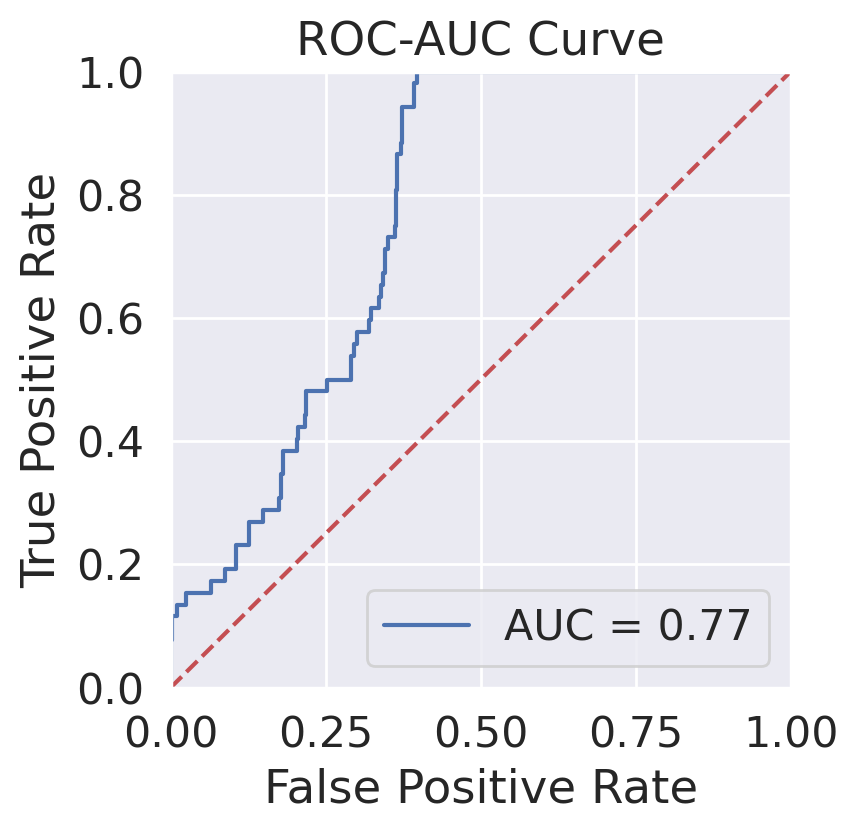

In [38]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(4,4))
plt.title('ROC-AUC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

cm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[35, 16,  1,  0,  0,  0,  0,  0,  0],
       [12, 62, 38,  1,  0,  1,  0,  0,  0],
       [ 6, 22, 70,  1,  4,  1,  0,  0,  1],
       [ 0,  0,  0, 13,  5, 17,  1,  1,  0],
       [ 0,  0,  0,  0, 12, 10,  3,  3,  0],
       [ 0,  0,  1,  2, 11, 71,  3, 12,  0],
       [ 0,  0,  1,  2,  0,  1, 19,  6,  0],
       [ 0,  0,  0,  1,  5, 24,  0, 42,  4],
       [ 0,  0,  0,  0,  0,  1,  0,  5, 17]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


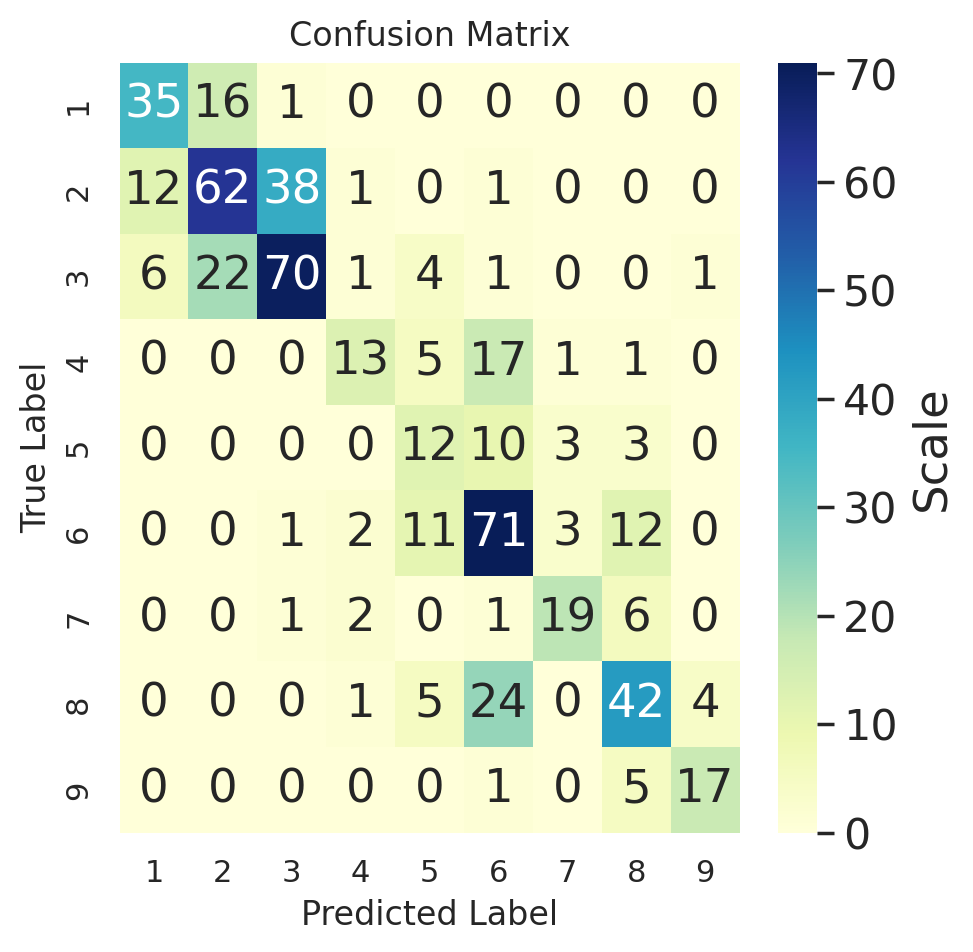

In [39]:
import seaborn
import matplotlib.pyplot as plt


def plot_confusion_matrix(data, labels, output_filename):

    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))

    plt.title("Confusion Matrix")

    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set(ylabel="True Label", xlabel="Predicted Label")

    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()


# define labels
labels = np.arange(1,10,1)

# create confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, labels, "confusion_matrix.png")